In [ ]:
# Importing libraries
# Numpy for array operations and also to do calculations
import numpy as np
# Pandas for load dataset and manipulation of tabular data
import pandas as pd
# Matplotlib for plotting different graphs
import matplotlib.pyplot as plt
%matplotlib inline

#from matplotlib import rcParams
#import matplotlib.gridspec as gridspec
#from IPython.core.pylabtools import figsize
#from datasist.structdata import detect_outliers

# seaborn library use to plot different plots
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
# For importing dataset from url
import urllib.request
# To interact with the underlying Operating System
import os
# For numerical computation and ML modeling phase 
import tensorflow as tf

In [ ]:
# Set warnings to be ignored
import warnings
#warnings.filterwarnings("ignore")

In [ ]:
# Maximzing view
#pd.set_option("display.max_rows", None)

In [ ]:
'''
# Utilizing GPU Processors on Colab
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
'''

"\n# Utilizing GPU Processors on Colab\ndevice_name = tf.test.gpu_device_name()\nif device_name != '/device:GPU:0':\n  raise SystemError('GPU device not found')\nprint('Found GPU at: {}'.format(device_name))\n"

In [ ]:
# Download dataset from repo raw file link is a must to be able to load the file &> /dev/null
!wget https://raw.githubusercontent.com/RamyGendy/Airline-Flight-Price-Prediction/main/Data_Train.xlsx

--2023-05-31 17:12:55--  https://raw.githubusercontent.com/RamyGendy/Airline-Flight-Price-Prediction/main/Data_Train.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 634522 (620K) [application/octet-stream]
Saving to: ‘Data_Train.xlsx’

Data_Train.xlsx     100%[===================>] 619.65K  --.-KB/s    in 0.05s   

2023-05-31 17:12:56 (11.5 MB/s) - ‘Data_Train.xlsx’ saved [634522/634522]



In [ ]:
# Read dataset from xlsx file , engine='openpyxl'
df = pd.read_excel('Data_Train.xlsx', engine='openpyxl')

## Date Exploration

In [ ]:
# Explore first 5 rows
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# Information Summery
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# View dataframe columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
# Check missing values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# View rows with missing values
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
# Check for duplicated values
df.duplicated().sum()

220

In [ ]:
# Check if duplicated values relation with our target
duplicated_df=df[df.duplicated()]
duplicated_df.shape

(220, 11)

In [ ]:
# Sort duplicated rows together
duplicates = df.duplicated(keep=False)
df_sorted = df[duplicates].sort_values(by='Price')
df_sorted.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
1535,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
2692,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
2044,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,4777
9097,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,4777
1826,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,06:00,08:45,2h 45m,non-stop,No info,4777
6770,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,06:00,08:45,2h 45m,non-stop,No info,4777
5470,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403
2634,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403


In [ ]:
# Display original and duplicated rows
df[duplicates]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
73,Jet Airways,24/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,7229
87,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [ ]:
# Total number of duplicated values
DupToTot = round((df.duplicated().sum())*100/len(df))
print ("Duplicated values in {} is about {} % of {} total values.".format(df.duplicated().sum(),DupToTot,len(df)))
if DupToTot < 10:
  print ("Removel of duplication is accepted.")
else:
    print ("Removel of duplication is NOT accepted.")

Duplicated values in 220 is about 2 % of 10683 total values.
Removel of duplication is accepted.


**Observations:**

* There is one missing values in features: `Total_Stops` and `Route`.
* Wrong Datatype in `Date_of_Journey`, `Dep_Time`, `Arrival_Time` and `Duration` : expected to be presented as `Date/time` format but found as `Object`.
* Wrong Datatype in `Total_Stops` : expected to be `Integer` but found as `Object`
* `Additional_Info` seems to have a lot of not relevant information.
* There is `220` duplicated rows within our dataframe.

#### Features Investegation

In [ ]:
# 1st Feature: `Airline` unique values
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
# Count values in `Airline` feature
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**Observations:**

* `Multiple carriers` is duplicated as `Multiple carriers Premium economy`.
* `Vistara` is duplicated as `Vistara Premium economy`.
* `Jet Airways` is splited into `Jet Airways` and `Jet Airways Business`
* `Trujet` has only one entry.

In [ ]:
# 2nd Feature: `Date_of_Journey` unique values
sorted(df["Date_of_Journey"].unique())

['01/03/2019',
 '03/03/2019',
 '06/03/2019',
 '09/03/2019',
 '1/03/2019',
 '1/04/2019',
 '1/05/2019',
 '1/06/2019',
 '12/03/2019',
 '12/04/2019',
 '12/05/2019',
 '12/06/2019',
 '15/03/2019',
 '15/04/2019',
 '15/05/2019',
 '15/06/2019',
 '18/03/2019',
 '18/04/2019',
 '18/05/2019',
 '18/06/2019',
 '21/03/2019',
 '21/04/2019',
 '21/05/2019',
 '21/06/2019',
 '24/03/2019',
 '24/04/2019',
 '24/05/2019',
 '24/06/2019',
 '27/03/2019',
 '27/04/2019',
 '27/05/2019',
 '27/06/2019',
 '3/03/2019',
 '3/04/2019',
 '3/05/2019',
 '3/06/2019',
 '6/03/2019',
 '6/04/2019',
 '6/05/2019',
 '6/06/2019',
 '9/03/2019',
 '9/04/2019',
 '9/05/2019',
 '9/06/2019']

In [ ]:
# `Date_of_Journey` value counts
df["Date_of_Journey"].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

**Observations:**

* All trips are in same year `2019`.
* All trips are within the month `03, 04, 05, 06`.
* All trips are within certain days `1, 3, 6, 9, 12, 15, 18, 21, 24, 27`.
* There are duplicated days in form of `01 & 1`, `03 & 3` and `09 & 9`.



In [ ]:
# 3rd Feature: `Source` unique values
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
# `Source` value counts
df["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
# 4th Feature: `Destination` unique values
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
# `Destination` value counts
df["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
# 5th Feature: `Route` unique values
df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [ ]:
# `Route` value counts
df["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [ ]:
# 6th Feature: `Dep_Time` unique values
df["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [ ]:
# `Dep_Time` value counts
df["Dep_Time"].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [ ]:
# 7th Feature: `Arrival_Time` unique values
df["Arrival_Time"].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [ ]:
# `Arrival_Time` value counts
df["Arrival_Time"].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [ ]:
# 8th Feature: `Duration` unique values
df["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [ ]:
# `Duration` value counts
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
# 9th Feature: `Total_Stops` unique values
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
# `Total_Stops` value counts
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
# View row where column 'Total_Stops' has the value '4 stops'
df[df['Total_Stops'] == '4 stops']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,01/03/2019,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50:00,11:20 02 Mar,29h 30m,4 stops,Change airports,17686


In [ ]:
# 9th Feature: `Additional_Info` unique values
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
# `Additional_Info` value counts
df["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

**Feature values explaination:**

* `Red-eye flight` meaning: flights that depart at night and arrive the next morning, especially when the total flight time is insufficient for passengers to get a full night’s sleep. The term derives from red eyes as a symptom of fatigue. Red-eye flights usually take off after 9 p.m. and arrive by 5 or 6 a.m.
* `layover` is the time between two connecting flights.
* `long layover` usually lasts around four hours for domestic flights and 24 hours for international flights . 
* `short layover` is typically just a few hours and is designed to give passengers some breathing room while changing planes .

In [ ]:
# 10th Feature: `Price` statistical description 
df["Price"].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

* The `mean` will be greater than the `median (50% count)`, our target is `Positively/Right skewed`.


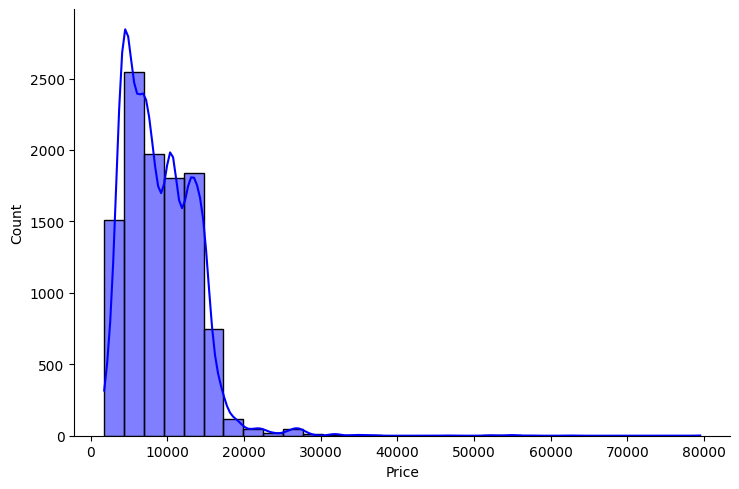

In [43]:
# 10th Feature: `Price` distribution
sns.displot(df["Price"], kde=True, bins=30, color='blue', height=5, aspect=1.5);

In [ ]:
# Check for outliers
fig = px.histogram(df, x="Price", histnorm='probability density',marginal="box")
fig.update_layout(autosize=False,width=800,height=500,)
fig.show();

In [ ]:
fig2 = px.histogram(df, x="Price", marginal="violin", hover_data=df.columns)
fig2.show()

* The `positive skewness` is clear with a tail of a distribution curve is longer on the right side. 
* This means the `outliers` of the distribution curve are further out towards the right and closer to the mean on the left.
* Skewness can affect the performance of our ML models. 
* i.e.: the model will be trained on a much larger number of values in one part of the distribution and will be less likely to successfully predict values in other parts of the distribution. 
* Skewness may also violate model assumptions or impair the interpretation of feature importance.
* transformations can help reduce skewness and make the data more normally distributed.

**Preprocessing is required before further investgation.**

## Data Preprocessing

Including:

1. Data Cleaning
2. Data Integration

In [44]:
#drop the null values
df.dropna(inplace=True)

## Exploratory Data Analysis:

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis
4. Business Q & A.

## Feature Engineering

1. Feature Extraction
2. Feature Selection
3. Feature Transformation